In [2]:
#import to do IA on image
from keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import random
import pandas as pd

In [3]:
# create array of images with every image in the data_/Snail/Snail_sample_<number>/image
# sort by those who start by before, after and comp

before =[]
comp=[]
after=[]


for i in range(0,os.listdir("../data_/Snail/").__len__()):
    before.append([])
    comp.append([])
    after.append([])


path= "../data_/Snail/"

for folder in os.listdir(path):
    
    number = folder.split("_")[2]
    number = int(number)
    for file in os.listdir(path+folder):
        if file.endswith(".tif"):
            
            if file.startswith("before"):
                before[number-1].append(path+folder+'/'+file)
            
            elif file.startswith("after"):
                after[number-1].append(path+folder+'/'+file)
            
            elif file.startswith("comp"):
                comp[number-1].append(path+folder+'/'+file)

In [4]:
#display first image of each list

#get lenght of each list
print("before: ", len(before))
print("comp: ", len(comp))
print("after: ", len(after))


before:  13
comp:  13
after:  13


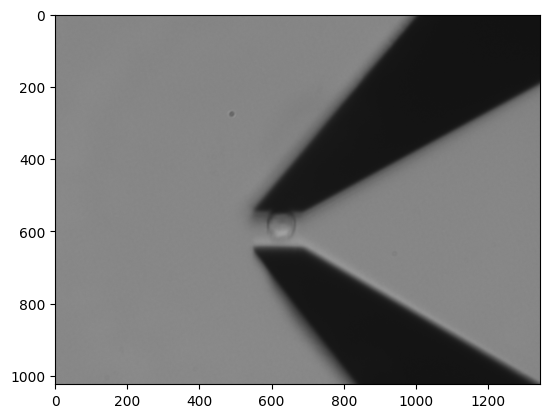

In [5]:
# for the image in the list, display the first image
# before
img=mpimg.imread(before[0][0])
imgplot = plt.imshow(img)
plt.show()

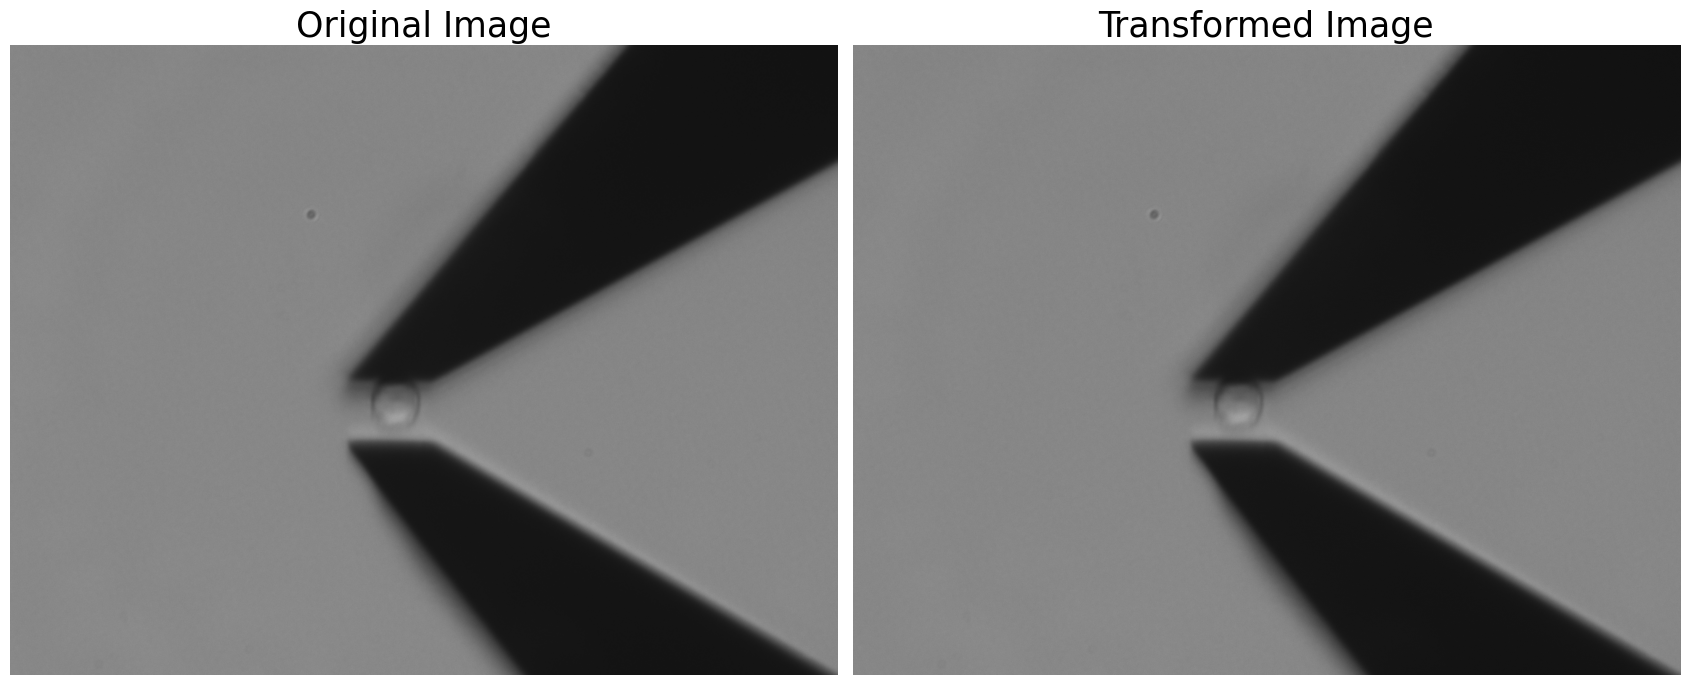

In [6]:
def fourier_transform_rgb(image):
    f_size = 25
    transformed_channels = []
    for i in range(3):
        rgb_fft = np.fft.fftshift(np.fft.fft2((image[:, :, i])))
        rgb_fft[:225, 235:237] = 1
        rgb_fft[-225:,235:237] = 1
        transformed_channels.append(abs(np.fft.ifft2(rgb_fft)))
    
    final_image = np.dstack([transformed_channels[0].astype(int), 
                             transformed_channels[1].astype(int), 
                             transformed_channels[2].astype(int)])
    
    fig, ax = plt.subplots(1, 2, figsize=(17,12))
    ax[0].imshow(image)
    ax[0].set_title('Original Image', fontsize = f_size)
    ax[0].set_axis_off()
    
    ax[1].imshow(final_image)
    ax[1].set_title('Transformed Image', fontsize = f_size)
    ax[1].set_axis_off()
    
    fig.tight_layout()


fourier_transform_rgb(img)

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def fourier_transform(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #display grey image
    plt.imshow(gray_image, cmap='gray')
    plt.show()

    # Perform Fourier transform
    f = np.fft.fft2(gray_image, axes=(0, 1), norm="ortho")
    f_shift = np.fft.fftshift(f)
    
    # Calculate the magnitude spectrum
    magnitude_spectrum = 20 * np.log(np.abs(f_shift))
    
    return magnitude_spectrum

# Load the image
image = cv2.imread(R"C:\Users\maxim\Desktop\before comp 14.6μm 2.png")

# Perform Fourier transform
result = fourier_transform(image)

# Display the original and Fourier transformed images
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(result, cmap='gray')
plt.title('Fourier Transform'), plt.xticks([]), plt.yticks([])
plt.show()

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
def inverse_fourier_transform(image):
    # Convert the image to grayscale
    #gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Perform inverse Fourier transform
    f = np.fft.ifft2(image, axes=(0, 1), norm="ortho")
    f_shift = np.fft.ifftshift(f)

    # Calculate the magnitude spectrum
    magnitude_spectrum = 20 * np.log(np.abs(f_shift))

    return magnitude_spectrum


# Perform Fourier transform
result = fourier_transform(result)

# Display the original image, Fourier transformed image, and the restored image
plt.subplot(131), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(result, cmap='gray')
plt.title('Fourier Transform'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(result, cmap='gray')
plt.title('Restored Image'), plt.xticks([]), plt.yticks([])
plt.show()

error: OpenCV(4.8.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x062af139::Set<1,-1,-1>,struct cv::impl::A0x062af139::Set<0,2,5>,3>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


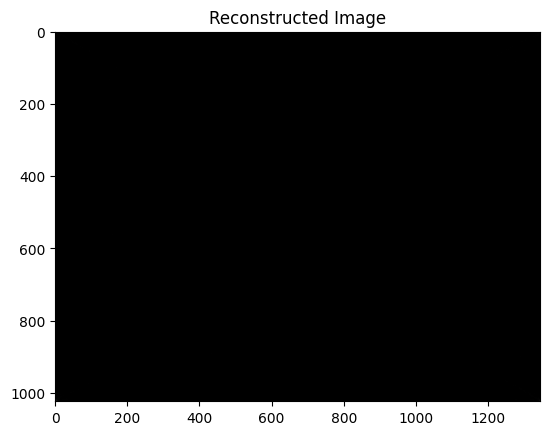

In [ ]:
def frequency_to_image(frequency_image):
    # Shift zero frequency component back to the corner
    f_shifted = np.fft.ifftshift(frequency_image)
    
    # Perform inverse Fourier Transform
    image_back = np.fft.ifft2(f_shifted)
    
    # Normalize the image
    image_back = np.abs(image_back)
    image_back = (image_back - np.min(image_back)) / (np.max(image_back) - np.min(image_back))
    
    return image_back

# Convert frequency domain image to spatial domain
reconstructed_image = frequency_to_image(result)

# Display the reconstructed image
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image')
plt.show()

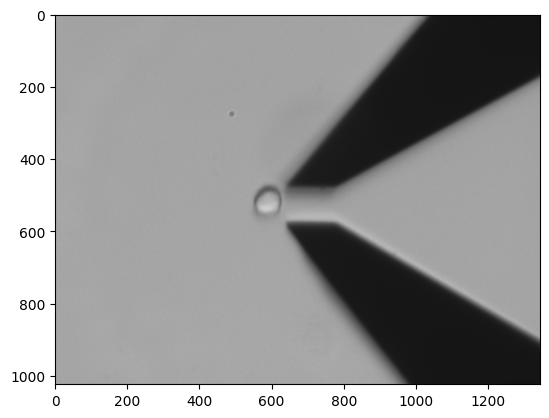

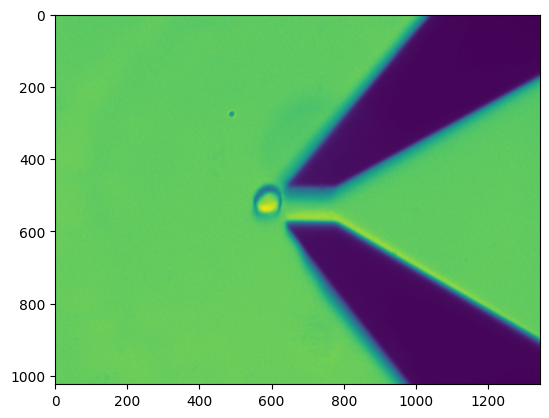

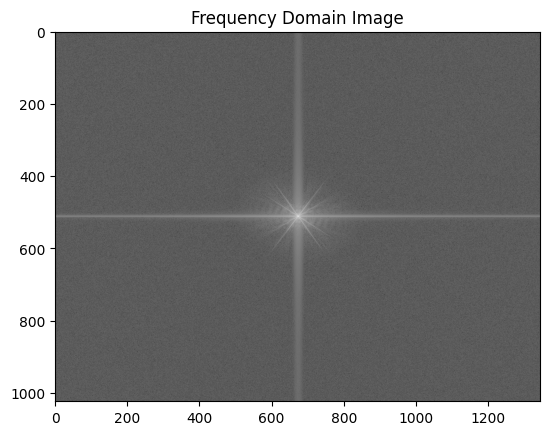

In [ ]:
# R"C:\Users\maxim\Documents\Cours\Projet\Cells_characteristics_Mems_ai\data_\Snail\Snail_sample_1\after com .tif")

def image_to_frequency(image):
    plt.imshow(image)
    plt.show()
    # Convert image to grayscale
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    plt.imshow(image)
    plt.show()
    # Perform Fourier Transform
    f = np.fft.fft2(image)
    
    # Shift zero frequency component to the center
    f_shifted = np.fft.fftshift(f)
    
    
    # Compute magnitude spectrum
    magnitude_spectrum = 20 * np.log(np.abs(f_shifted))
    return magnitude_spectrum

# Load the image
image = cv2.imread(R"C:\Users\maxim\Documents\Cours\Projet\Cells_characteristics_Mems_ai\data_\Snail\Snail_sample_1\after com .tif")

# Convert image to frequency domain
frequency_image = image_to_frequency(image)

# Display the frequency domain image
plt.imshow(frequency_image, cmap='gray')
plt.title('Frequency Domain Image')
plt.show()


In [ ]:
image = cv2.imread(R"C:\Users\maxim\Documents\Cours\Projet\Cells_characteristics_Mems_ai\data_\Snail\Snail_sample_1\after com .tif")
print(image)

[[[166 166 166]
  [165 165 165]
  [164 164 164]
  ...
  [ 21  21  21]
  [ 20  20  20]
  [ 20  20  20]]

 [[161 161 161]
  [164 164 164]
  [165 165 165]
  ...
  [ 20  20  20]
  [ 21  21  21]
  [ 20  20  20]]

 [[163 163 163]
  [168 168 168]
  [165 165 165]
  ...
  [ 20  20  20]
  [ 21  21  21]
  [ 20  20  20]]

 ...

 [[164 164 164]
  [167 167 167]
  [165 165 165]
  ...
  [ 21  21  21]
  [ 21  21  21]
  [ 21  21  21]]

 [[166 166 166]
  [164 164 164]
  [166 166 166]
  ...
  [ 21  21  21]
  [ 20  20  20]
  [ 21  21  21]]

 [[166 166 166]
  [165 165 165]
  [166 166 166]
  ...
  [ 21  21  21]
  [ 21  21  21]
  [ 21  21  21]]]


In [ ]:
#get rid of some frequency
def remove_frequency(image):
    if image.shape[0] == 3:
        image = np.transpose(image, (1,2,0))
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Perform Fourier Transform
    f = np.fft.fft2(gray_image)
    

TypeError: Image data of dtype complex128 cannot be converted to float

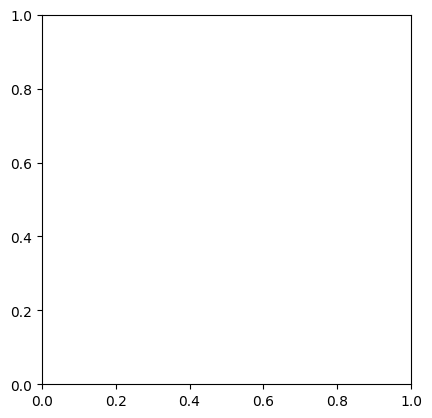

In [ ]:
def frequency_to_image(frequency_image):
    # Shift zero frequency component back to the corner
    f_shifted = np.fft.ifftshift(frequency_image)
    
    # Perform inverse Fourier Transform
    image_back = np.fft.ifft2(f_shifted, axes=(0, 1), norm="ortho"),
    plt.imshow(image_back)
    plt.show()
    # Take the real part of the image
    image_back = np.abs(image_back)
    
    # Normalize the image to 0-255
    image_back = (image_back - np.min(image_back)) / (np.max(image_back) - np.min(image_back))
    image_back = (image_back * 255).astype(np.uint8)
    
    return image_back

# Convert frequency domain image to spatial domain
reconstructed_image = frequency_to_image(frequency_image)

# Display the reconstructed image
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image')
plt.show()

In [ ]:
import cv2
import numpy as np
#import matplotlib.pyplot as plt

def image_to_frequency(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Fourier transform
    f = np.fft.fft2(gray_image)
    
    # Shift the zero-frequency component to the center of the spectrum
    f_shifted = np.fft.fftshift(f)
    
    # Convert the complex amplitudes to magnitudes
    magnitude_spectrum = 20 * np.log(np.abs(f_shifted))
    
    return magnitude_spectrum

def frequency_to_image(frequency,i=20):
    # Shift the zero-frequency component back to the corner
    f_shifted = np.fft.ifftshift(frequency)
    
    # Convert magnitudes back to complex amplitudes
    f = np.exp(f_shifted / 20) * np.exp(1j * np.angle(f_shifted))
    # Apply inverse Fourier transform
    inverse_image = np.fft.ifft2(np.fft.ifftshift(f))
    #plot
    #plt.imshow(inverse_image)
    #plt.show()
    # Convert the image to the original data type (e.g., uint8)
    #plt.imshow(inverse_image)
    inverse_image = np.abs(inverse_image).astype(np.uint8)
    
    return inverse_image

# Example usage
# Load the image
image = cv2.imread(R"C:\Users\maxim\Documents\Cours\Projet\Cells_characteristics_Mems_ai\data_\Snail\Snail_sample_1\after com .tif")

# Transform the image to the frequency domain
frequency_state = image_to_frequency(image)

# Convert the frequency state back to the image domain
reconstructed_image = frequency_to_image(frequency_state)

#for i in range(11,23):
#    reconstructed_image = frequency_to_image(frequency_state,i)
#    cv2.imshow(f'Reconstructed Image n°{i}', reconstructed_image)

#reconstructed_image = frequency_to_image(reconstructed_image)

# Display the original image and the reconstructed image
cv2.imshow('Original Image', image)
cv2.imshow('Reconstructed Image', reconstructed_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


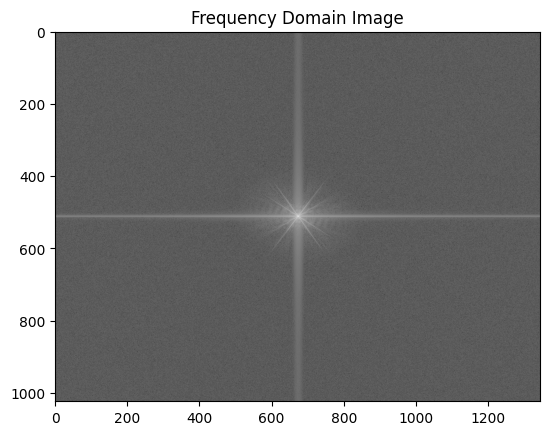

In [ ]:
# display the frequency image
plt.imshow(frequency_state, cmap='gray')
plt.title('Frequency Domain Image')
plt.show()


In [ ]:
import cv2
import numpy as np

def image_to_frequency(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    f = np.fft.fft2(gray_image)
    f_shifted = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(f_shifted) + 1)
    amplitude_spectrum = np.abs(f_shifted)
    phase_spectrum = np.angle(f_shifted)
    return magnitude_spectrum, amplitude_spectrum, phase_spectrum

def frequency_to_image(frequency, image_shape):
    f_shifted = np.fft.ifftshift(frequency)
    f = np.exp(f_shifted / 20) * np.exp(1j * np.angle(f_shifted))
    inverse_image = np.fft.ifft2(np.fft.ifftshift(f))
    inverse_image = np.abs(inverse_image).astype(np.uint8)
    inverse_image = cv2.resize(inverse_image, image_shape[::-1])
    return inverse_image

# Example usage
image = cv2.imread(R"C:\Users\maxim\Documents\Cours\Projet\Cells_characteristics_Mems_ai\data_\Snail\Snail_sample_1\after com .tif")
original_shape = image.shape[:2]

frequency_state = image_to_frequency(image)
reconstructed_image = frequency_to_image(frequency_state, original_shape)

cv2.imshow('Original Image', image)
cv2.imshow('Reconstructed Image', reconstructed_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\maxim\AppData\Local\Temp\ipykernel_29656\3060838101.py:15: RuntimeWarning: overflow encountered in exp
  f = np.exp(f_shifted / 20) * np.exp(1j * np.angle(f_shifted))
C:\Users\maxim\AppData\Local\Temp\ipykernel_29656\3060838101.py:15: RuntimeWarning: invalid value encountered in multiply
  f = np.exp(f_shifted / 20) * np.exp(1j * np.angle(f_shifted))


error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:3699: error: (-215:Assertion failed) !dsize.empty() in function 'cv::hal::resize'


In [ ]:
import cv2
import numpy as np

def image_to_frequency(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    f = np.fft.fft2(gray_image)
    f_shifted = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(f_shifted) + 1)
    amplitude_spectrum = np.abs(f_shifted)
    phase_spectrum = np.angle(f_shifted)
    return magnitude_spectrum, amplitude_spectrum, phase_spectrum

def frequency_to_image(frequency, image_shape, max_frequency):
    f_shifted = np.fft.ifftshift(frequency)
    
    # Determine the frequency range based on the max frequency
    rows, cols = image_shape
    max_freq_row = int(rows / 2 * max_frequency)
    max_freq_col = int(cols / 2 * max_frequency)
    
    f_shifted[0:max_freq_row, :] = 0
    f_shifted[rows-max_freq_row:rows, :] = 0
    f_shifted[:, 0:max_freq_col] = 0
    f_shifted[:, cols-max_freq_col:cols] = 0
    
    f = np.exp(f_shifted / 20 + 1j * np.angle(f_shifted))
    inverse_image = np.fft.ifft2(np.fft.ifftshift(f))
    inverse_image = np.abs(inverse_image).astype(np.uint8)
    inverse_image = cv2.resize(inverse_image, image_shape[::-1])
    
    return inverse_image

# Example usage
image = cv2.imread(R"C:\Users\maxim\Documents\Cours\Projet\Cells_characteristics_Mems_ai\data_\Snail\Snail_sample_1\after com .tif")
original_shape = image.shape[:2]
max_frequency = 0.1  # Adjust this value based on the desired frequency range

frequency_state = image_to_frequency(image)
reconstructed_image = frequency_to_image(frequency_state, original_shape, max_frequency)

cv2.imshow('Original Image', image)
cv2.imshow('Reconstructed Image', reconstructed_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:3699: error: (-215:Assertion failed) !dsize.empty() in function 'cv::hal::resize'


In [ ]:
import cv2
import numpy as np

def image_to_frequency(image, max_frequency):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Calculate the appropriate cutoff frequency
    rows, cols = gray_image.shape
    max_freq_row = int(rows / 2 * max_frequency)
    max_freq_col = int(cols / 2 * max_frequency)
    
    # Apply Fourier transform
    f = np.fft.fft2(gray_image)
    
    # Shift the zero-frequency component to the center of the spectrum
    f_shifted = np.fft.fftshift(f)
    
    # Apply frequency cutoff by setting high-frequency components to zero
    f_shifted[0:max_freq_row, :] = 0
    f_shifted[rows-max_freq_row:rows, :] = 0
    f_shifted[:, 0:max_freq_col] = 0
    f_shifted[:, cols-max_freq_col:cols] = 0
    
    # Convert the complex amplitudes to magnitudes
    magnitude_spectrum = 20 * np.log(np.abs(f_shifted) + 1)
    
    return magnitude_spectrum

def frequency_to_image(frequency):
    # Shift the zero-frequency component back to the corner
    f_shifted = np.fft.ifftshift(frequency)
    
    # Convert magnitudes back to complex amplitudes
    f = np.exp(f_shifted / 20) * np.exp(1j * np.angle(f_shifted))
    
    # Apply inverse Fourier transform
    inverse_image = np.fft.ifft2(f)
    
    # Convert the image to the original data type (e.g., uint8)
    inverse_image = np.abs(inverse_image).astype(np.uint8)
    
    return inverse_image

# Example usage
image = cv2.imread(R"C:\Users\maxim\Documents\Cours\Projet\Cells_characteristics_Mems_ai\data_\Snail\Snail_sample_1\after com .tif")
max_frequency = 500000  # Adjust this value based on the desired frequency range

frequency_state = image_to_frequency(image, max_frequency)
reconstructed_image = frequency_to_image(np.exp(frequency_state / 20))

cv2.imshow('Original Image', image)
cv2.imshow('Reconstructed Image', reconstructed_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
image = cv2.imread(R"C:\Users\maxim\Documents\Cours\Projet\Cells_characteristics_Mems_ai\data_\Snail\Snail_sample_1\after com .tif")
# create matrice of image size
matrice = np.zeros([image.shape[0],image.shape[1]])
print(image.shape)
for i in image.shape[0]:
    for j in image.shape[1]:
        #for k in image.shape[2]:
        print(image[i][j])

(1024, 1344, 3)


TypeError: 'int' object is not iterable